In [146]:
# read text files in logs directory and print out the results
import os
import pandas as pd
import matplotlib.pyplot as plt

LOG_DIRECTORY = './logs/logs/'

In [147]:
# Read the latest log file

# Get the latest log file
def get_latest_log_file():
    # get the list of files in the directory
    files = os.listdir(LOG_DIRECTORY)    
    # sort the files
    files.sort()
    # get the latest file
    latest_file = files[-1]
    # return the latest file
    print('Reading log file: ' + latest_file)
    return LOG_DIRECTORY + latest_file

def read_log_file():
    # get the latest log file
    log_file = get_latest_log_file()
    # read the file
    with open(log_file, 'r') as f:
        lines = f.readlines()
    return lines
        
lines = read_log_file()
display(lines)

Reading log file: c5_2024-01-25_11-34-31.yaml


['\x1b[ INFO] [1706200472.558713074]: using default namespace\x1b\n',
 '\x1b[ INFO] [1706200472.572413396]: Waiting for FCU connection\x1b\n',
 '\x1b[ INFO] [1706200472.790999266, 6551.882000000]: Connected to FCU\x1b\n',
 '\x1b[ INFO] [1706200472.791080677, 6551.882000000]: Waiting for user to set mode to GUIDED\x1b\n',
 '\x1b[ INFO] [1706200472.791098629, 6551.882000000]: Mode set to GUIDED. Mission starting\x1b\n',
 '\x1b-------------------------------------------------\x1b\n',
 'Current Time:    6552.882000000\n',
 'Drone State:     3.29545, -4.59002, 1.02, -88.4593, 0.0141421, nan\n',
 'Drone Orien:     -0.00122223, 0.000816725, -88.4593\n',
 'Marker State:    5.34106, -4.5414, 0.1, -90, 0.224055\n',
 'Distance to cp:  2.38996\n',
 'Intersect State: 5.68491, -4.5414, 1, -88.8343, 2\n',
 'Acceleration:    3 m/s^2\n',
 'Destination xyz: -4.5414, -5.68491, 1\n',
 'Mode: Targeting\n',
 '\x1b-------------------------------------------------\x1b\n',
 'Current Time:    6553.382000000\n',

In [148]:
# parse the log file
# log file has multiple segments, each segment starts with a line with the following format "Current Time: "

# divide the log file into segments
# parse each segment

# remove red lines from the log file
lines = [line.strip() for line in lines if not line.startswith('\x1b')]
lines

['Current Time:    6552.882000000',
 'Drone State:     3.29545, -4.59002, 1.02, -88.4593, 0.0141421, nan',
 'Drone Orien:     -0.00122223, 0.000816725, -88.4593',
 'Marker State:    5.34106, -4.5414, 0.1, -90, 0.224055',
 'Distance to cp:  2.38996',
 'Intersect State: 5.68491, -4.5414, 1, -88.8343, 2',
 'Acceleration:    3 m/s^2',
 'Destination xyz: -4.5414, -5.68491, 1',
 'Mode: Targeting',
 'Current Time:    6553.382000000',
 'Drone State:     3.28435, -4.59002, 1.02, -88.4638, 0.01, -0.00414214',
 'Drone Orien:     -0.00126069, 0.00231878, -88.4638',
 'Search State:    5.22904, -4.5414, 0.1, -90, 0.224055',
 'Distance to cp:  2.27209',
 'Intersect State: 5.55593, -4.5414, 1, -88.7738, 2',
 'Acceleration:    3 m/s^2',
 'Destination xyz: -4.5414, -5.55593, 1',
 'Mode: Searching',
 'Current Time:    6553.882000000',
 'Drone State:     3.29545, -4.59002, 1.019, -88.7809, 0.280713, 0.270713',
 'Drone Orien:     0.0013856, 0.180323, -88.7809',
 'Search State:    5.11701, -4.5414, 0.1, -90

In [149]:
pairs = [((s:=line.split(':'))[0].strip(), s[1].strip()) for line in lines]
pairs

[('Current Time', '6552.882000000'),
 ('Drone State', '3.29545, -4.59002, 1.02, -88.4593, 0.0141421, nan'),
 ('Drone Orien', '-0.00122223, 0.000816725, -88.4593'),
 ('Marker State', '5.34106, -4.5414, 0.1, -90, 0.224055'),
 ('Distance to cp', '2.38996'),
 ('Intersect State', '5.68491, -4.5414, 1, -88.8343, 2'),
 ('Acceleration', '3 m/s^2'),
 ('Destination xyz', '-4.5414, -5.68491, 1'),
 ('Mode', 'Targeting'),
 ('Current Time', '6553.382000000'),
 ('Drone State', '3.28435, -4.59002, 1.02, -88.4638, 0.01, -0.00414214'),
 ('Drone Orien', '-0.00126069, 0.00231878, -88.4638'),
 ('Search State', '5.22904, -4.5414, 0.1, -90, 0.224055'),
 ('Distance to cp', '2.27209'),
 ('Intersect State', '5.55593, -4.5414, 1, -88.7738, 2'),
 ('Acceleration', '3 m/s^2'),
 ('Destination xyz', '-4.5414, -5.55593, 1'),
 ('Mode', 'Searching'),
 ('Current Time', '6553.882000000'),
 ('Drone State', '3.29545, -4.59002, 1.019, -88.7809, 0.280713, 0.270713'),
 ('Drone Orien', '0.0013856, 0.180323, -88.7809'),
 ('Searc

In [150]:
# Convert list of tuples to dictionary

frames = [] # list of dictionaries

for k,v in pairs:
    k = k.strip().replace(' ', '_').lower()
    if k == 'current_time': 
        frames.append({
            k:float(v)
        })
    else:
        comps = v.split(',')
        if len(comps) == 1:
            frames[-1][k] = v.strip()
        else:
            for i, comp in enumerate(comps,1):
                k_comp = k + '_' + str(i)
                try: frames[-1][k_comp] = float(comp.strip())
                except: frames[-1][k_comp] = comp.strip()
        
frames

[{'current_time': 6552.882,
  'drone_state_1': 3.29545,
  'drone_state_2': -4.59002,
  'drone_state_3': 1.02,
  'drone_state_4': -88.4593,
  'drone_state_5': 0.0141421,
  'drone_state_6': nan,
  'drone_orien_1': -0.00122223,
  'drone_orien_2': 0.000816725,
  'drone_orien_3': -88.4593,
  'marker_state_1': 5.34106,
  'marker_state_2': -4.5414,
  'marker_state_3': 0.1,
  'marker_state_4': -90.0,
  'marker_state_5': 0.224055,
  'distance_to_cp': '2.38996',
  'intersect_state_1': 5.68491,
  'intersect_state_2': -4.5414,
  'intersect_state_3': 1.0,
  'intersect_state_4': -88.8343,
  'intersect_state_5': 2.0,
  'acceleration': '3 m/s^2',
  'destination_xyz_1': -4.5414,
  'destination_xyz_2': -5.68491,
  'destination_xyz_3': 1.0,
  'mode': 'Targeting'},
 {'current_time': 6553.382,
  'drone_state_1': 3.28435,
  'drone_state_2': -4.59002,
  'drone_state_3': 1.02,
  'drone_state_4': -88.4638,
  'drone_state_5': 0.01,
  'drone_state_6': -0.00414214,
  'drone_orien_1': -0.00126069,
  'drone_orien_2

In [151]:
data = pd.DataFrame(frames)
data.rename(columns={
    'current_time':'time',
    
    # Drone State
    'drone_state_1': 'drone_x',
    'drone_state_2': 'drone_y',
    'drone_state_3': 'drone_z',
    'drone_state_4': 'drone_hdg',
    'drone_state_5': 'drone_spd',
    'drone_state_6': 'drone_acc',
    'drone_orien_1': 'drone_roll',
    'drone_orien_1': 'drone_roll',
    'drone_orien_2': 'drone_pitch',
    'drone_orien_3': 'drone_yaw',
    
    # Marker State
    'marker_state_1': 'marker_x',
    'marker_state_2': 'marker_y',
    'marker_state_3': 'marker_z',
    'marker_state_4': 'marker_hdg',
    'marker_state_5': 'marker_spd',
    
    # intersection State
    'intersect_state_1': 'intersect_x',
    'intersect_state_2': 'intersect_y',
    'intersect_state_3': 'intersect_z',
    'intersect_state_4': 'intersect_hdg',
    'intersect_state_5': 'intersect_spd',
    
    # Search State
    'search_state_1': 'search_x',
    'search_state_2': 'search_y',
    'search_state_3': 'search_z',
    'search_state_4': 'search_hdg',
    'search_state_5': 'search_spd',
}, inplace=True)
data.set_index('time', inplace=True)
data

,drone_x,drone_y,drone_z,drone_hdg,drone_spd,drone_acc,drone_roll,drone_pitch,drone_yaw,marker_x,...,acceleration,destination_xyz_1,destination_xyz_2,destination_xyz_3,mode,search_x,search_y,search_z,search_hdg,search_spd
time,,,,,,,,,,,,,,,,,,,,,
6552.882,3.29545,-4.59002,1.020,-88.4593,0.014142,NaN,-0.001222,0.000817,-88.4593,5.34106,...,3 m/s^2,-4.54140,-5.68491,1.0,Targeting,NaN,NaN,NaN,NaN,NaN
6553.382,3.28435,-4.59002,1.020,-88.4638,0.010000,-0.004142,-0.001261,0.002319,-88.4638,NaN,...,3 m/s^2,-4.54140,-5.55593,1.0,Searching,5.22904,-4.5414,0.1,-90.0,0.224055
6553.882,3.29545,-4.59002,1.019,-88.7809,0.280713,0.270713,0.001386,0.180323,-88.7809,NaN,...,3 m/s^2,-4.54140,-5.42321,1.0,Searching,5.11701,-4.5414,0.1,-90.0,0.224055
6554.382,3.69490,-4.59002,1.016,-88.8099,1.270160,0.989444,0.000601,0.113691,-88.8099,NaN,...,3 m/s^2,-4.54140,-5.22528,1.0,Searching,5.00498,-4.5414,0.1,-90.0,0.224055
6554.882,4.34955,-4.59002,1.019,-88.7246,1.320340,0.050183,-0.002321,-0.059024,-88.7246,6.30592,...,3 m/s^2,-4.54431,-6.81139,1.0,Targeting,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997.882,2.51874,-4.59911,1.020,-88.5836,0.740068,-0.029997,-0.000823,-0.001064,-88.5836,3.56426,...,3 m/s^2,-4.56029,-4.00804,1.0,Targeting,NaN,NaN,NaN,NaN,NaN
6998.382,2.86271,-4.59911,1.020,-88.5681,0.690072,-0.049995,-0.000479,0.004487,-88.5681,3.90564,...,3 m/s^2,-4.55758,-4.34065,1.0,Targeting,NaN,NaN,NaN,NaN,NaN
6998.882,3.20668,-4.59911,1.020,-88.5171,0.670075,-0.019998,-0.000668,0.004945,-88.5171,4.21819,...,3 m/s^2,-4.55727,-4.63616,1.0,Targeting,NaN,NaN,NaN,NaN,NaN


In [152]:
data.keys()

Index(['drone_x', 'drone_y', 'drone_z', 'drone_hdg', 'drone_spd', 'drone_acc',
       'drone_roll', 'drone_pitch', 'drone_yaw', 'marker_x', 'marker_y',
       'marker_z', 'marker_hdg', 'marker_spd', 'distance_to_cp', 'intersect_x',
       'intersect_y', 'intersect_z', 'intersect_hdg', 'intersect_spd',
       'acceleration', 'destination_xyz_1', 'destination_xyz_2',
       'destination_xyz_3', 'mode', 'search_x', 'search_y', 'search_z',
       'search_hdg', 'search_spd'],
      dtype='object')

<Axes: xlabel='time'>

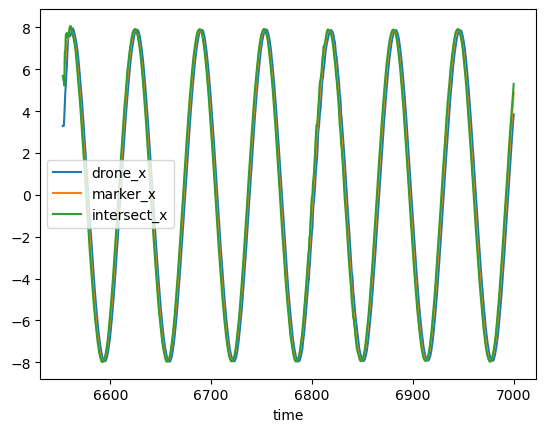

In [153]:
# plot Drone_State_1 and Marker_State_1 together over time
data[['drone_x', 'marker_x', 'intersect_x']].plot()

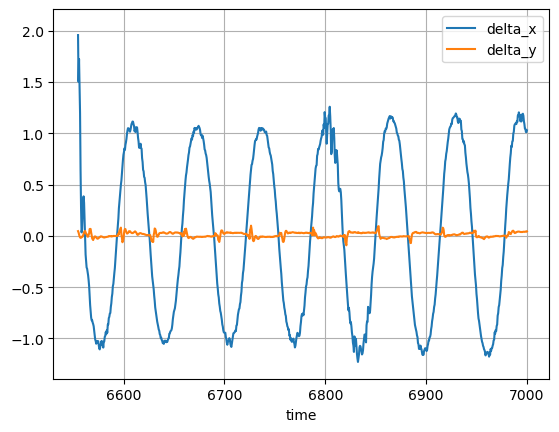

In [154]:
# plot the difference between the marker and drone positions
(data['marker_x']-data['drone_x']).plot()
(data['marker_y']-data['drone_y']).plot()
plt.legend(['delta_x', 'delta_y'])
plt.grid()

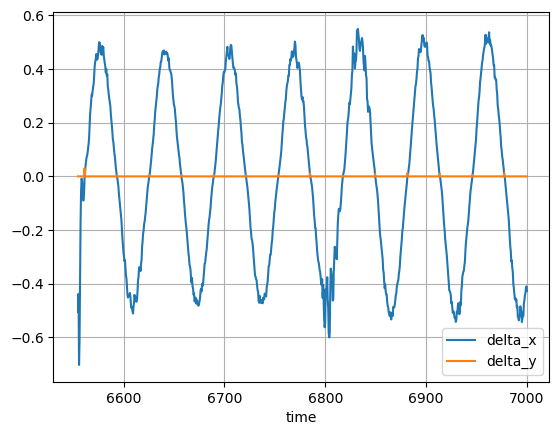

In [155]:
# plot the difference between the marker and drone positions
(data['marker_x']-data['intersect_x']).plot()
(data['marker_y']-data['intersect_y']).plot()
plt.legend(['delta_x', 'delta_y'])
plt.grid()

Text(0.5, 1.0, 'Drone and Marker Speeds')

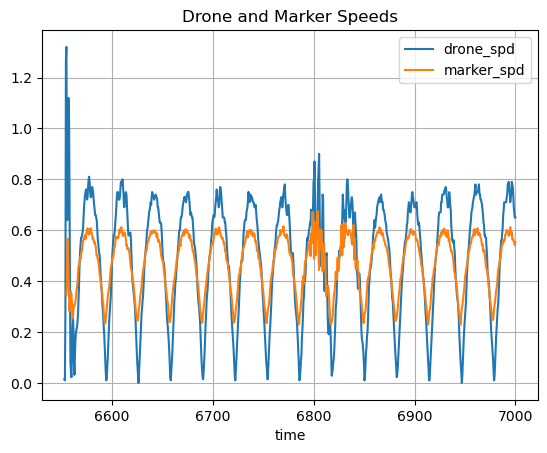

In [156]:
# plot marker velocity and drone velocity
data[['drone_spd', 'marker_spd']].plot()
plt.grid()
plt.title('Drone and Marker Speeds')

Text(0.5, 1.0, 'Drone and Marker Headings')

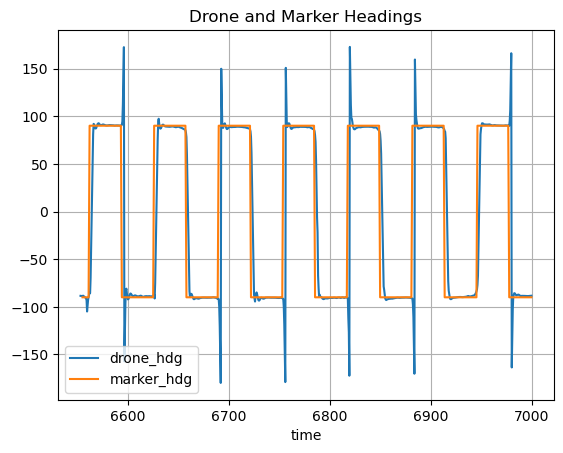

In [157]:
# plot marker heading and drone heading
data[['drone_hdg', 'marker_hdg']].plot()
plt.grid()
plt.title('Drone and Marker Headings')

Text(0.5, 1.0, 'Drone Mode')

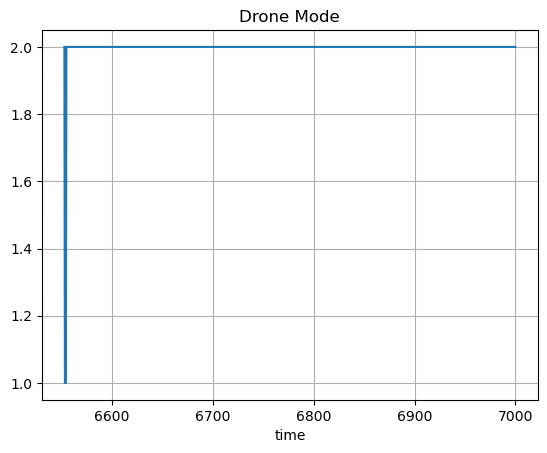

In [158]:
# plot value of 0 when drone is Scanning, and 1 when drone is Searching, and 2 when drone is Targeting
data['drone_mode_int'] = data['mode'].apply(lambda x: 0 if x == 'Scanning' else 1 if x == 'Searching' else 2)
data['drone_mode_int'].plot()
plt.grid()
plt.title('Drone Mode')

Text(0.5, 1.0, 'Drone Acceleration')

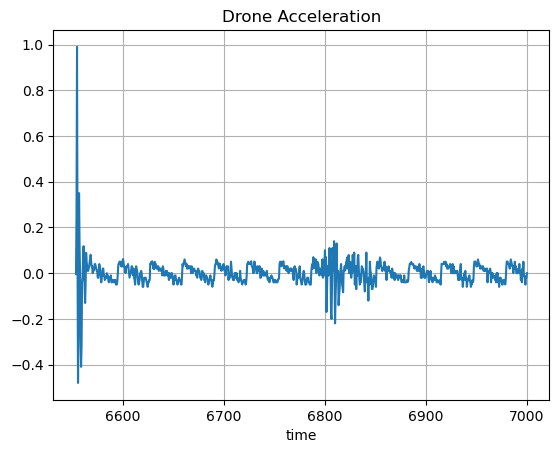

In [160]:
# plot drone acceleration
data['drone_acc'].plot()
plt.grid()
plt.title('Drone Acceleration')

Text(0.5, 1.0, 'Drone Roll and Pitch')

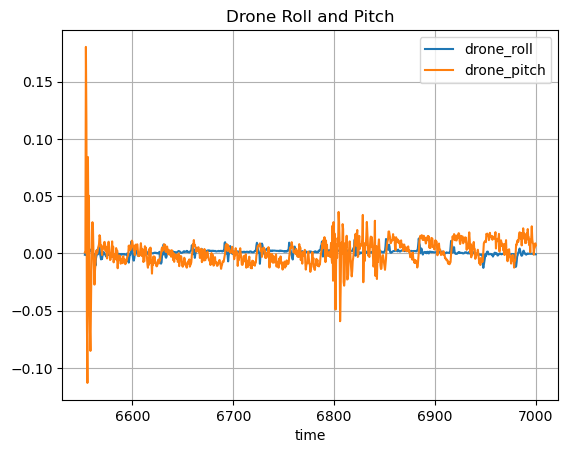

In [163]:
# plot drone roll, pitch, and yaw
data[['drone_roll', 'drone_pitch']].plot()
plt.grid()
plt.title('Drone Roll and Pitch')